<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/Q10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing - Word Embedding
# Samuel Gomes
# Prof. Fernando J. Von Zuben
# FEEC/Unicamp 


## Goal: Implement NLP's model Word2Vec using Gensim, as well as explore its embedding.

#### Imports

In [1]:
# Imports needed and logging
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#### Read the compressed version of [OpinRank](https://http://kavita-ganesan.com/entity-ranking-data/#.YNJoZWhKiUk) dataset and print its first line

In [2]:
data_file="/content/reviews_data.txt.gz" # Please, define the working directory appropriately

with gzip.open (data_file, 'rb') as f:
    for i,line in enumerate (f):
        print(line)
        break

b"Oct 12 2009 \tNice trendy hotel location not too bad.\tI stayed in this hotel for one night. As this is a fairly new place some of the taxi drivers did not know where it was and/or did not want to drive there. Once I have eventually arrived at the hotel, I was very pleasantly surprised with the decor of the lobby/ground floor area. It was very stylish and modern. I found the reception's staff geeting me with 'Aloha' a bit out of place, but I guess they are briefed to say that to keep up the coroporate image.As I have a Starwood Preferred Guest member, I was given a small gift upon-check in. It was only a couple of fridge magnets in a gift box, but nevertheless a nice gesture.My room was nice and roomy, there are tea and coffee facilities in each room and you get two complimentary bottles of water plus some toiletries by 'bliss'.The location is not great. It is at the last metro stop and you then need to take a taxi, but if you are not planning on going to see the historic sites in Be

#### Read the compressed dataset in a list





In [3]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")

2021-06-22 22:47:58,458 : INFO : reading file /content/reviews_data.txt.gz...this may take a while
2021-06-22 22:47:58,461 : INFO : read 0 reviews
2021-06-22 22:48:00,251 : INFO : read 10000 reviews
2021-06-22 22:48:02,047 : INFO : read 20000 reviews
2021-06-22 22:48:04,147 : INFO : read 30000 reviews
2021-06-22 22:48:06,109 : INFO : read 40000 reviews
2021-06-22 22:48:08,305 : INFO : read 50000 reviews
2021-06-22 22:48:10,373 : INFO : read 60000 reviews
2021-06-22 22:48:12,409 : INFO : read 70000 reviews
2021-06-22 22:48:13,984 : INFO : read 80000 reviews
2021-06-22 22:48:15,664 : INFO : read 90000 reviews
2021-06-22 22:48:17,326 : INFO : read 100000 reviews
2021-06-22 22:48:18,955 : INFO : read 110000 reviews
2021-06-22 22:48:20,608 : INFO : read 120000 reviews
2021-06-22 22:48:22,270 : INFO : read 130000 reviews
2021-06-22 22:48:24,060 : INFO : read 140000 reviews
2021-06-22 22:48:25,709 : INFO : read 150000 reviews
2021-06-22 22:48:27,904 : INFO : read 160000 reviews
2021-06-22 22:

In [4]:
type(documents)

list

In [6]:
len(documents)

255404

#### Train the model

Essentially Word2Vec is a MLP with one hidden layer and linear identity as activation function in all it units. The model is trained to predict a word based on the context. Success in achievement of these linguistic tasks requires the design of a dense coding space which carries language syntax, semantics, morphology and pragmatics. To achieve this, we are interested in learn the weights of the hidden layer. 


The cell below trains the model, resulting on a learned vector also known as the embeddings. We can think of these embeddings as some features that describe the target word.

In [11]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2021-06-22 22:58:24,953 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2021-06-22 22:58:24,956 : INFO : collecting all words and their counts
2021-06-22 22:58:24,957 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-06-22 22:58:25,229 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2021-06-22 22:58:25,498 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2021-06-22 22:58:25,823 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2021-06-22 22:58:26,109 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2021-06-22 22:58:26,438 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2021-06-22 22:58:26,750 : INFO : PROGRESS: at sentence #60000, processed 11013726 words, keeping 76786 word types
2021-06-22 22:58:27,032 : INFO : PROGRESS: a

(303490089, 415193580)

#### Exploring the embedding: Looking for similarities

With the dense feature space, arises notions of distance, similarity and proximity between points. In fact, we can look for similar words just by grouping the nearest points located with the target word.

Return the top10 similar words of w1


In [12]:
w1 = "dirty"
model.wv.most_similar (positive=w1)

2021-06-22 23:15:40,764 : INFO : precomputing L2-norms of word weight vectors


[('filthy', 0.8691210150718689),
 ('unclean', 0.7858108878135681),
 ('stained', 0.7763628363609314),
 ('dusty', 0.7555725574493408),
 ('grubby', 0.7478533387184143),
 ('smelly', 0.7455364465713501),
 ('grimy', 0.7255845069885254),
 ('dingy', 0.72552490234375),
 ('gross', 0.7146574258804321),
 ('soiled', 0.7115694880485535)]

Instead of 10 words, return top6 similar words of w1

In [13]:
# look up top 6 words similar to 'polite'
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

[('courteous', 0.9236257076263428),
 ('friendly', 0.8397226929664612),
 ('cordial', 0.8104430437088013),
 ('curteous', 0.8035148978233337),
 ('professional', 0.7905375361442566),
 ('attentive', 0.7682445645332336)]

In [14]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('canada', 0.6561681032180786),
 ('germany', 0.6408320665359497),
 ('spain', 0.6407790780067444),
 ('gaulle', 0.6275467276573181),
 ('england', 0.624111533164978),
 ('detroit', 0.6037352681159973)]

In [15]:
# look up top 6 words similar to 'shocked'
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

[('amazed', 0.8089025020599365),
 ('horrified', 0.7941641807556152),
 ('dismayed', 0.7689108848571777),
 ('stunned', 0.7683414816856384),
 ('astonished', 0.7626813054084778),
 ('appalled', 0.7495394945144653)]

Using posivite (w1) and negative (w2) examples to indicate what should be considered as related.

In [16]:
# get everything related to stuff on the bed
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duvet', 0.707446813583374),
 ('blanket', 0.7047407627105713),
 ('quilt', 0.693661093711853),
 ('mattress', 0.6929143071174622),
 ('matress', 0.6891158819198608),
 ('pillowcase', 0.6642000079154968),
 ('pillows', 0.6416904330253601),
 ('sheets', 0.6299810409545898),
 ('comforter', 0.6209383010864258),
 ('foam', 0.617141842842102)]

Check the similarity between two different words with close meaning

In [17]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

0.7455365

Check which element of the list is located farthest from the others

In [18]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(['bed','pillow','duvet','shower'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'shower'

#### Visualizing the embedding: t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Thus, the goal is to compress the word embedding with t-SNE so we can be able to visualize the notions of distance, similarity and proximity between words.

In [19]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=18).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

The cell below compare where the vector representation of Bed (red dot), his 10 most similar words from the model (dots in red), as well as 8 random ones (dots in green), lies in a 2D graph

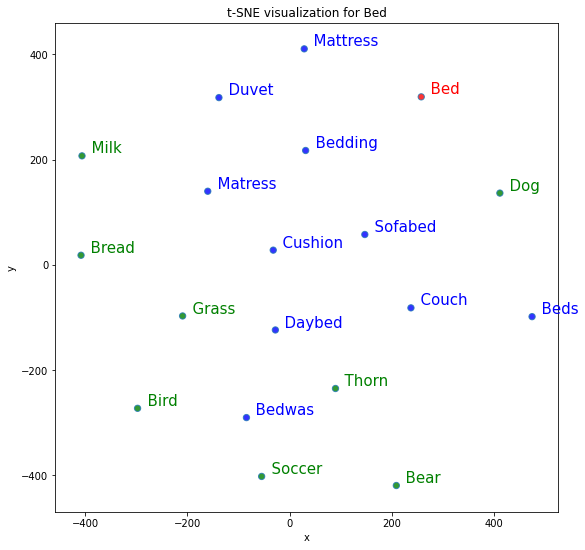

In [20]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt

tsnescatterplot(model, 'bed', ['dog', 'bird', 'grass', 'milk', 'soccer', 'bread', 'thorn', 'bear'])

Target word: Matress


Similarities with 10 most similar words vs. 11th to 20th most similar words

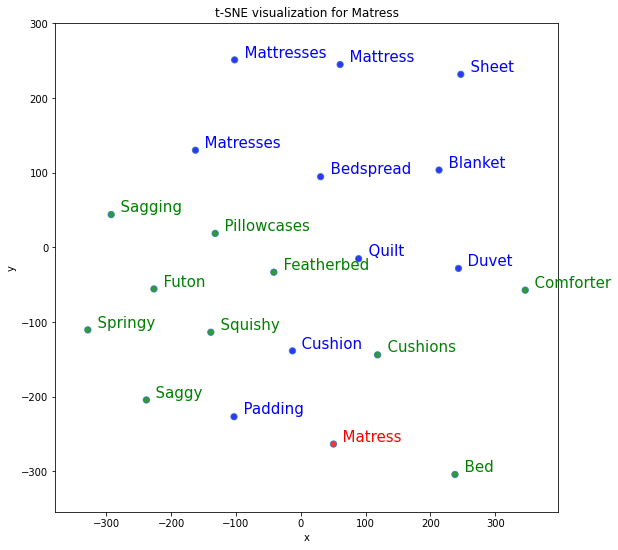

In [21]:
tsnescatterplot(model, "matress", [t[0] for t in model.wv.most_similar(positive=["matress"], topn=20)][10:])


### References

### 1. https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Xwa18pWSncc
### 2.https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb
### 3. https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial